In [229]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# Question 1

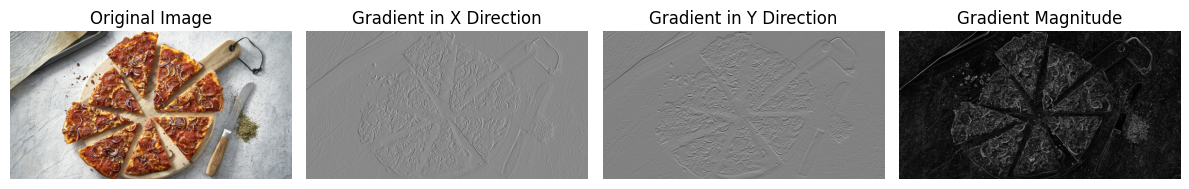

In [230]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/new-dataset/new dataset/pepperoni-pizza.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(grad_x**2 + grad_y**2)
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Gradient in X Direction")
plt.imshow(grad_x, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Gradient in Y Direction")
plt.imshow(grad_y, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Gradient Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


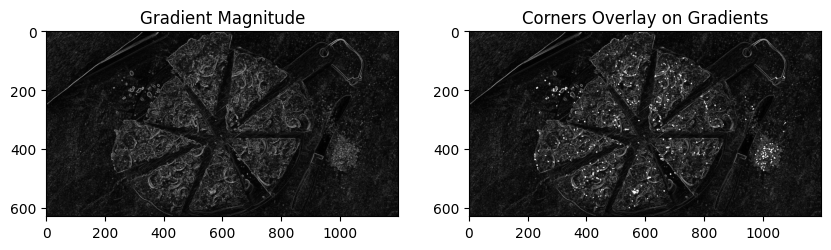

In [231]:

dst = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
dst = cv2.dilate(dst, None)


threshold = 0.10 * dst.max()
corners = dst > threshold

overlay = np.copy(magnitude)
overlay[corners] = 255  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gradient Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Corners Overlay on Gradients")
plt.imshow(overlay, cmap='gray')
plt.show()


It does recognize pepperoni slidces but not alll slices and it's mostly wrong . 


sharp edges are indefied of the crust 


Can not identify chesse texture

The alog stuggles with corner detection as it detects corner where there is a high intensity change in multiple direction . But in pizza its not available for all corners , all the corners of the pizza is not a sharp corner . That's why the algortihm struggles .

# Sandwich

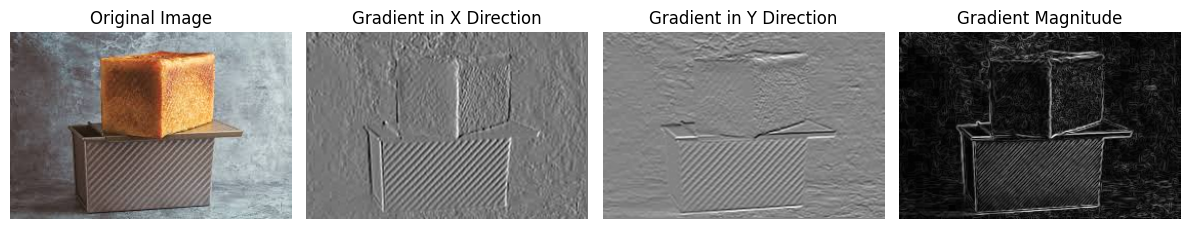

In [232]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/new-dataset/new dataset/images.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(grad_x**2 + grad_y**2)
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Gradient in X Direction")
plt.imshow(grad_x, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Gradient in Y Direction")
plt.imshow(grad_y, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Gradient Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


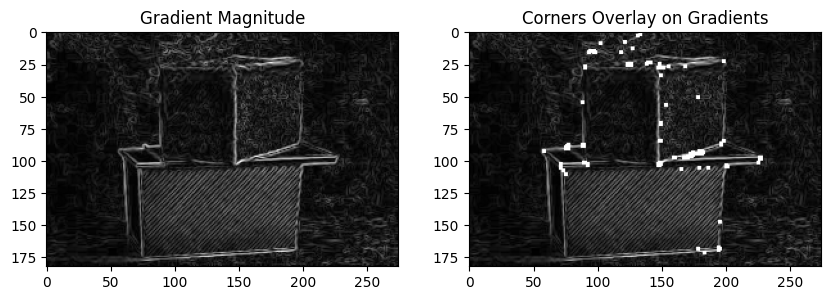

In [233]:

dst = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
dst = cv2.dilate(dst, None)

threshold = 0.05 * dst.max()
corners = dst > threshold

overlay = np.copy(magnitude)
overlay[corners] = 255  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gradient Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Corners Overlay on Gradients")
plt.imshow(overlay, cmap='gray')
plt.show()


for sandwich harris is happier as sqr sndsich has 90 degree corner 

# Question 2

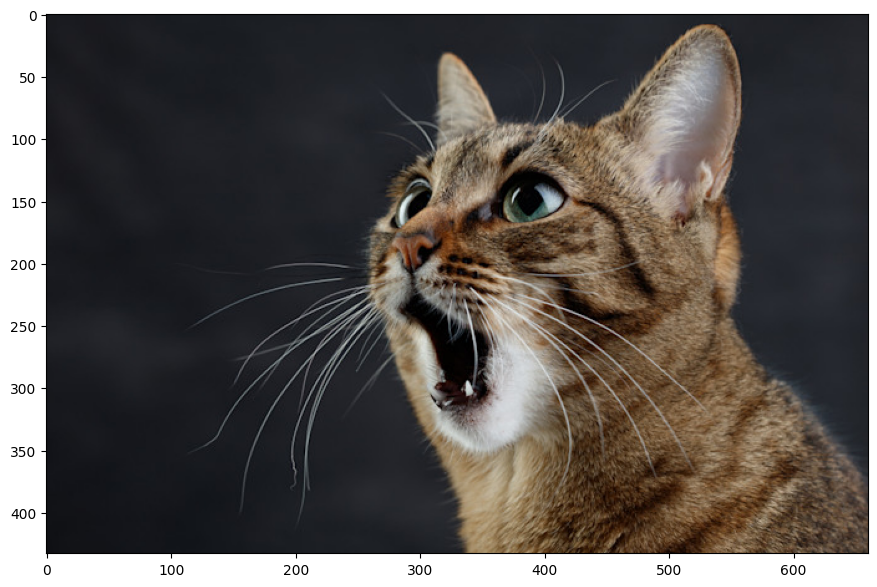

In [234]:
img = cv2.imread('/kaggle/input/new-dataset/new dataset/shocked-cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


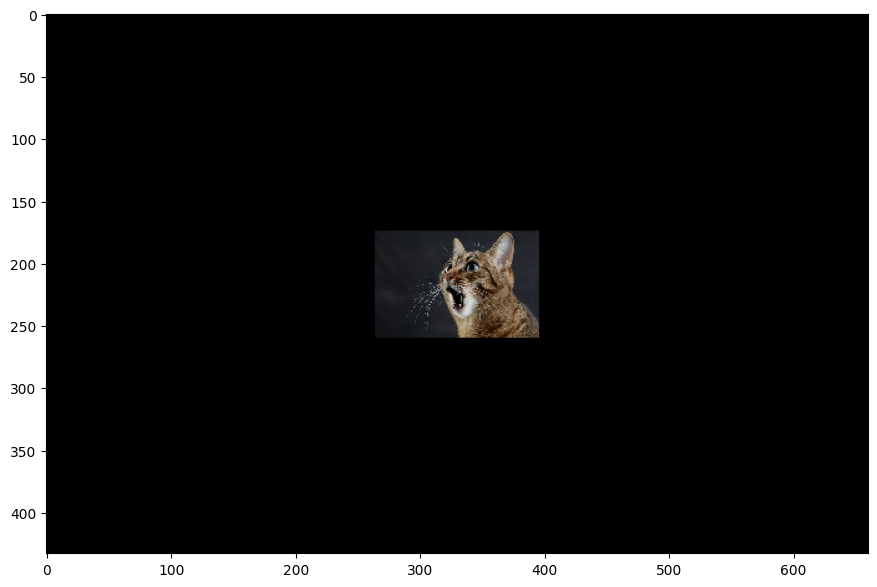

In [235]:
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),0,0.2)
dst = cv2.warpAffine(img,M,(cols,rows))
dst_bgr = cv2.cvtColor(dst, cv2.COLOR_RGB2BGR)
cv2.imwrite('/kaggle/working/shocked-cat-transformed.jpg', dst_bgr)
plt.imshow(dst)

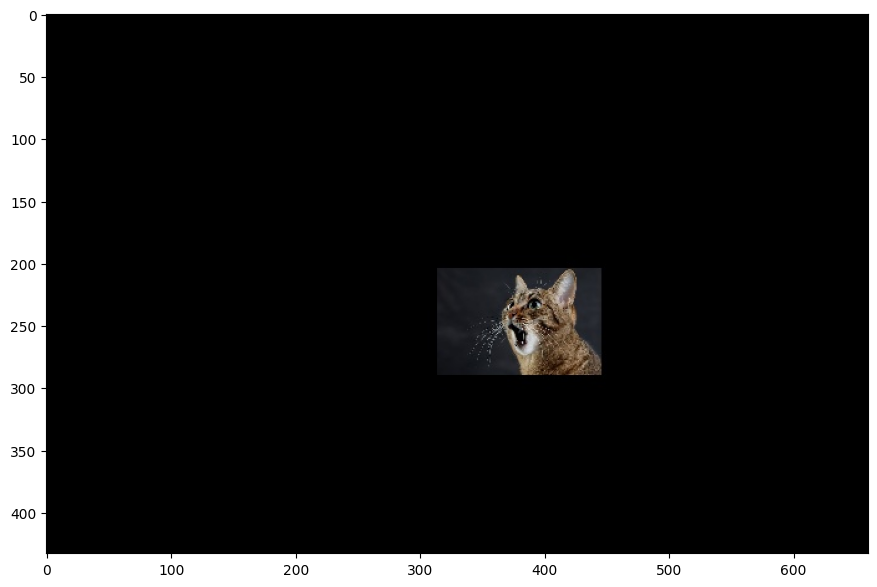

In [236]:
img = cv2.imread('/kaggle/working/shocked-cat-transformed.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

shift_x = 50  
shift_y = 30  

translation_matrix = np.float32([[1, 0, shift_x],
                                  [0, 1, shift_y]])


translated_image = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))
dst_bgr = cv2.cvtColor(dst, cv2.COLOR_RGB2BGR)
cv2.imwrite('/kaggle/working/shocked-cat-translated.jpg', dst_bgr)

plt.imshow(translated_image)

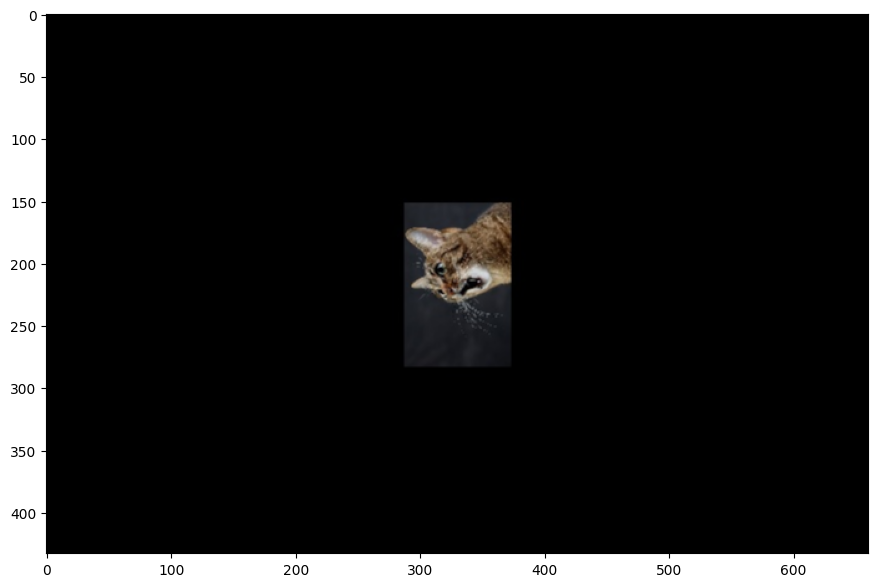

In [237]:
img = cv2.imread('/kaggle/working/shocked-cat-translated.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
dst_bgr = cv2.cvtColor(dst, cv2.COLOR_RGB2BGR)
cv2.imwrite('/kaggle/working/shocked-cat-roatate.jpg', dst_bgr)

plt.imshow(dst)

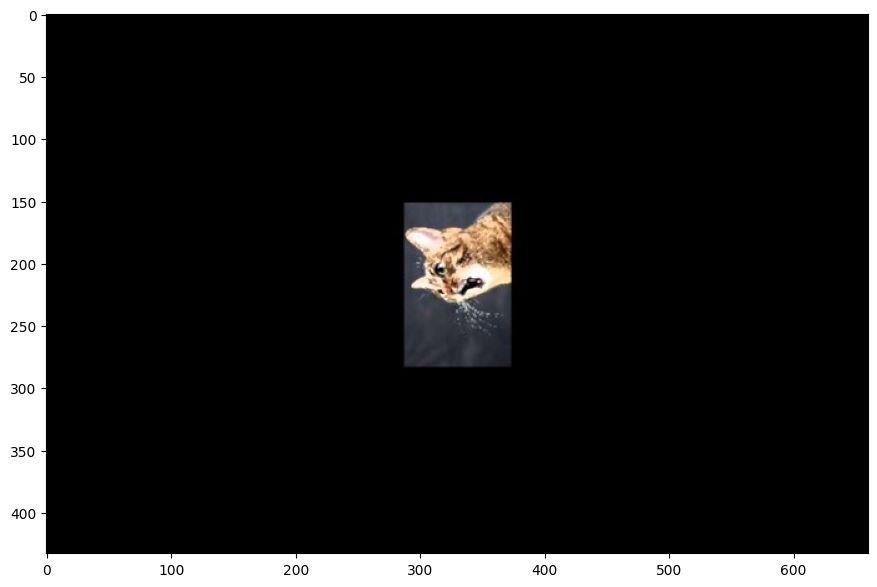

In [238]:
img = cv2.imread('/kaggle/working/shocked-cat-roatate.jpg')


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

hsv[:, :, 2] = np.clip(hsv[:, :, 2] * 1.8, 0, 255)  

bright_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

cv2.imwrite('/kaggle/working/shocked-cat-glowing.jpg', cv2.cvtColor(bright_img, cv2.COLOR_RGB2BGR))
plt.imshow(bright_img)

# Part 2

Number of Keypoints Detected In The Original Image:  1340
Number of Keypoints Detected In The Test Image:  135


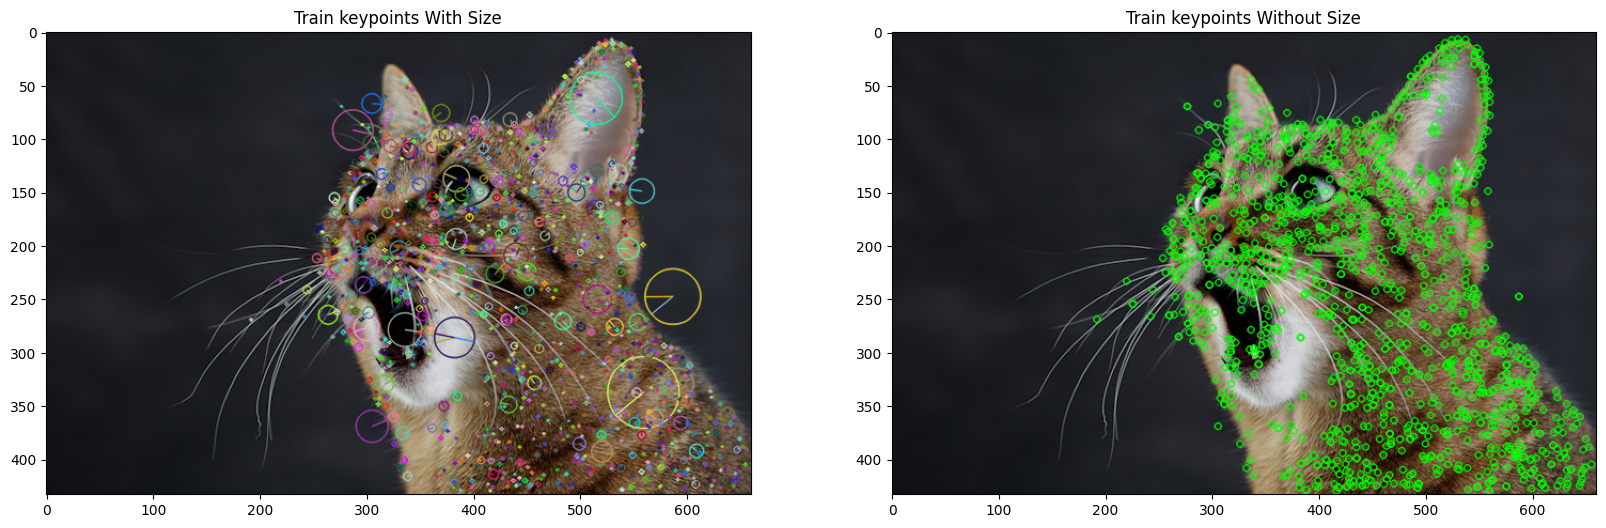

In [239]:
original_img = cv2.imread("/kaggle/input/new-dataset/new dataset/shocked-cat.jpg")
test_img = cv2.imread("/kaggle/working/shocked-cat-glowing.jpg")

original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(original_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(original_img)
keypoints_with_size = np.copy(original_img)

cv2.drawKeypoints(original_img, train_keypoints, keypoints_without_size, color=(0, 255, 0))
cv2.drawKeypoints(original_img, train_keypoints, keypoints_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(cv2.cvtColor(keypoints_with_size, cv2.COLOR_BGR2RGB))

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(cv2.cvtColor(keypoints_without_size, cv2.COLOR_BGR2RGB))

print("Number of Keypoints Detected In The Original Image: ", len(train_keypoints))
print("Number of Keypoints Detected In The Test Image: ", len(test_keypoints))

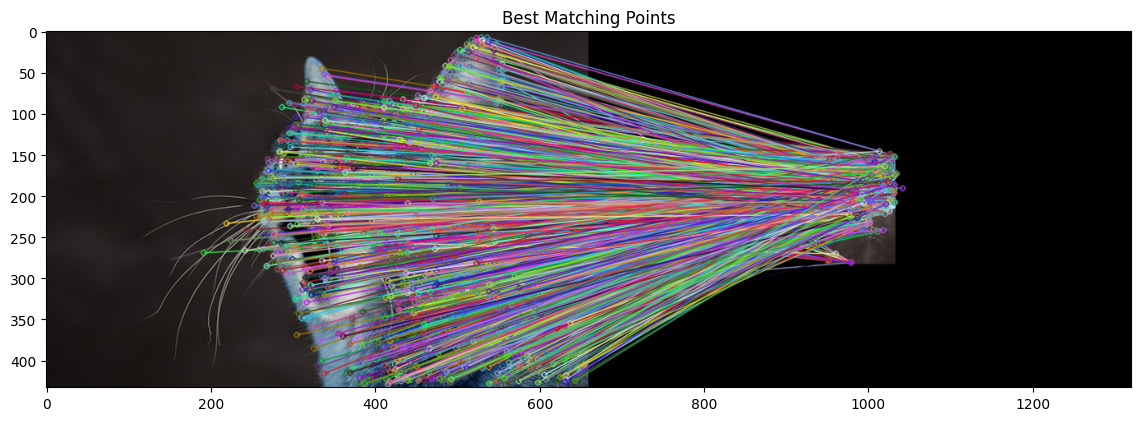


Number of Matching Keypoints Between The Training and Query Images:  1340


In [240]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

matches = bf.match(train_descriptor, test_descriptor)
matches = sorted(matches, key=lambda x: x.distance)

result = cv2.drawMatches(original_img, train_keypoints, test_img, test_keypoints, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# Cat and Dog

Number of Keypoints Detected In The Original Image:  1340
Number of Keypoints Detected In The Test Image:  421


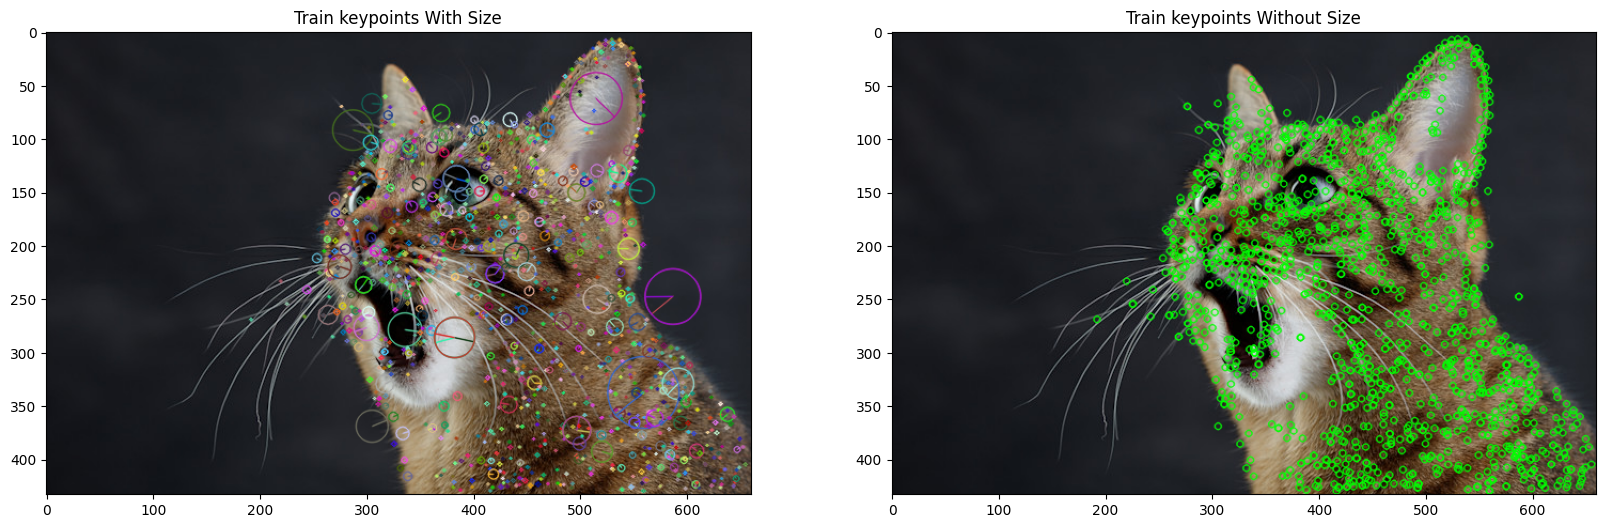

In [241]:
original_img = cv2.imread("/kaggle/input/new-dataset/new dataset/shocked-cat.jpg")
test_img = cv2.imread("/kaggle/input/dowwwggggy/doggyyy.jpeg")

original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(original_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(original_img)
keypoints_with_size = np.copy(original_img)

cv2.drawKeypoints(original_img, train_keypoints, keypoints_without_size, color=(0, 255, 0))
cv2.drawKeypoints(original_img, train_keypoints, keypoints_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(cv2.cvtColor(keypoints_with_size, cv2.COLOR_BGR2RGB))

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(cv2.cvtColor(keypoints_without_size, cv2.COLOR_BGR2RGB))

print("Number of Keypoints Detected In The Original Image: ", len(train_keypoints))
print("Number of Keypoints Detected In The Test Image: ", len(test_keypoints))

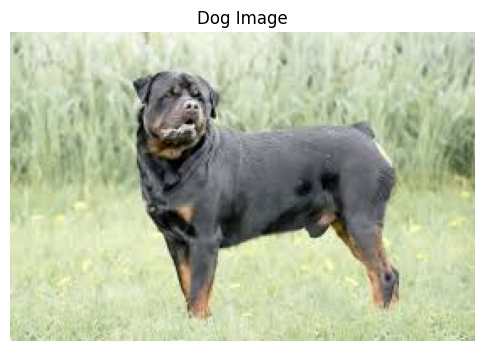

In [242]:
dog_img = cv2.imread("/kaggle/input/dowwwggggy/doggyyy.jpeg")


dog_img_rgb = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.title("Dog Image")
plt.imshow(dog_img_rgb)
plt.axis("off")  
plt.show()

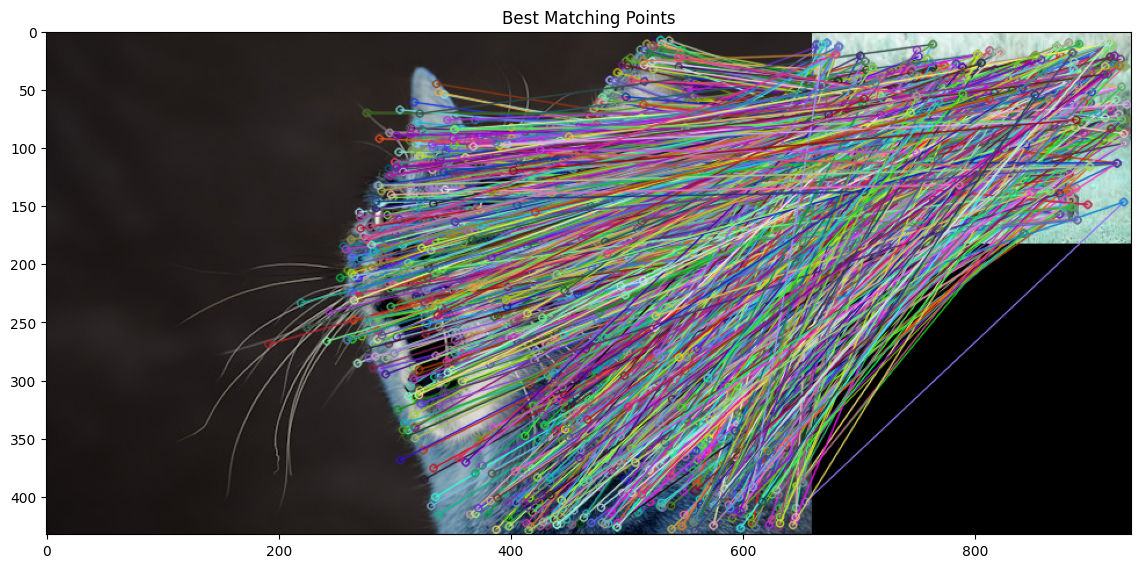


Number of Matching Keypoints Between The Training and Query Images:  1340


In [243]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

matches = bf.match(train_descriptor, test_descriptor)
matches = sorted(matches, key=lambda x: x.distance)

result = cv2.drawMatches(original_img, train_keypoints, test_img, test_keypoints, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# Result


it cant handle this disguise as SIFT maps local features and a cat and dog has a lot of similar local features

# Question 3

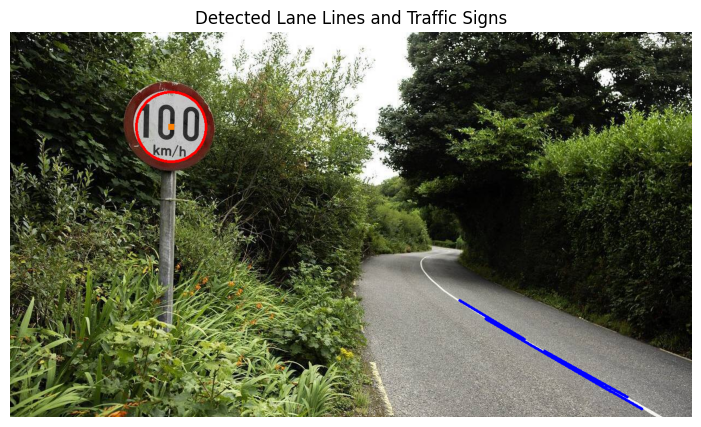

In [244]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/circleeeeeeeeeeee/3743861_4_org_iStock-1225288296.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

rho = 1
theta = np.pi / 180
threshold = 200
min_line_length = 100
max_line_gap = 2

lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

lane_line_img = np.copy(image)

if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lane_line_img, (x1, y1), (x2, y2), (255, 0, 0), 3) 


circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=20, param2=70, minRadius=40, maxRadius=80)


if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(lane_line_img, (x, y), r, (0, 0, 255), 4) 
        cv2.rectangle(lane_line_img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)


plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(lane_line_img, cv2.COLOR_BGR2RGB)) 
plt.title('Detected Lane Lines and Traffic Signs')
plt.axis('off')
plt.show()
